In [15]:
import numpy as np
import scipy
import seaborn as sns
import datasets
import evaluate
from tqdm.notebook import tqdm
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

import utils

In [16]:
train_ds, valid_ds, test_ds = utils.load_dataset()

Found cached dataset civil_comments (/home/johnny/.cache/huggingface/datasets/civil_comments/default/0.9.0/e7a3aacd2ab7d135fa958e7209d10b1fa03807d44c486e3c34897aa08ea8ffab)


  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(train_ds['text'])
train_word_features = word_vectorizer.transform(train_ds['text'])

In [27]:
classifier = LogisticRegression(C=1.0, solver='lbfgs')
classifier.fit(train_word_features, train_ds['label'])

LogisticRegression()

In [28]:
valid_word_features = word_vectorizer.transform(valid_ds['text'])
scores = classifier.predict_proba(valid_word_features)[:,1]
roc_auc_score(valid_ds['label'], scores)

0.9356376807393105

<AxesSubplot:>

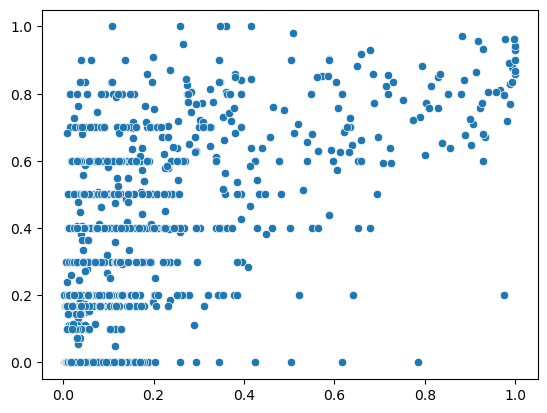

In [24]:
sns.scatterplot(x=scores, y=valid_ds['toxicity'])

In [25]:
test_word_features = word_vectorizer.transform(test_ds['text'])
scores = classifier.predict_proba(test_word_features)[:,1]

In [26]:
np.save('scores/ngram', scores)